# 데이터 불러오기

In [1]:
# 사용할 모듈 호출
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [2]:
# csv 파일을 읽어서 pandas dataFrame으로 변환
csv_data = pd.read_csv('./data.csv', encoding='cp949')
csv_data

,Unnamed: 0,Sep,Oct,Nov,Dec,Jan,Feb
0,총매출,"$5,280,000","$5,501,000","$5,469,000","$5,480,000","$5,533,000","$5,554,000"
1,목표매출,"$5,280,000","$5,500,000","$5,729,000","$5,968,000","$6,217,000","$6,476,000"
2,광고비용,"$1,056,000","$950,400","$739,200","$528,000","$316,800","$316,800"
3,소셜네트워크비용,$0,"$105,600","$316,800","$528,000","$739,200","$739,200"
4,1온스별단가,$2.00,$2.00,$2.00,$1.90,$1.90,$1.90


---

# 데이터 전처리 함수

In [3]:
# 기호를 제거하고 int 타입으로 캐스팅
def delete_sign(s):
    return int(s.lstrip('$').replace(',',''))

---

# 데이터 변수 할당

In [4]:
# x축 데이터
x = csv_data.columns[1:]
print(x)
# y축 데이터
total_sales = [*map(delete_sign, csv_data.loc[0, x])]
sales_goal = [*map(delete_sign, csv_data.loc[1, x])]
print(f'총 매출 : {total_sales}')
print(f'목표 매출 : {sales_goal}')

Index(['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'], dtype='object')
총 매출 : [5280000, 5501000, 5469000, 5480000, 5533000, 5554000]
목표 매출 : [5280000, 5500000, 5729000, 5968000, 6217000, 6476000]


---

# 6개월 간의 매출 추이

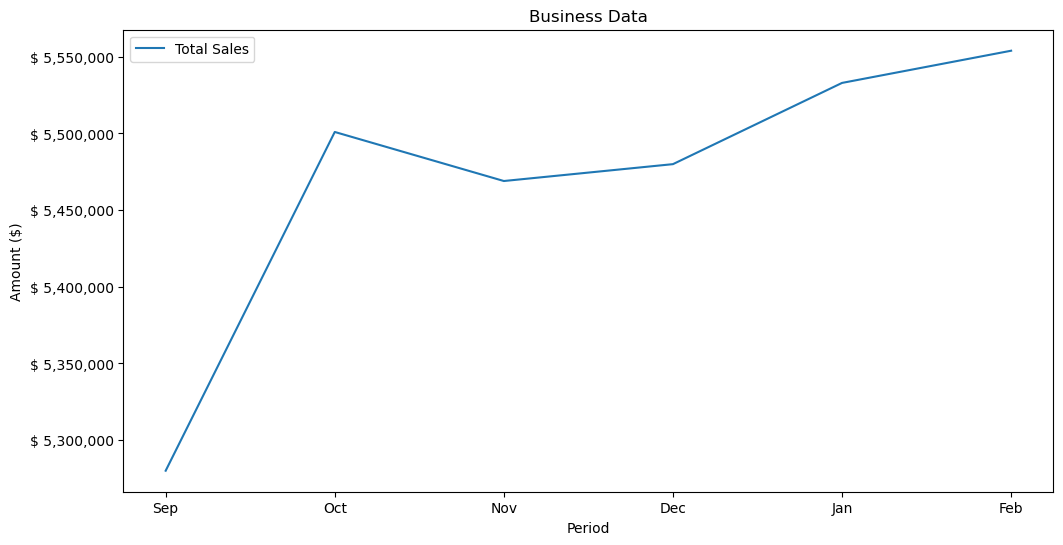

In [5]:
# y축 포매팅
formatter = FuncFormatter(lambda x, _: '$ '+format(int(x), ','))

_, ax = plt.subplots(figsize=(12,6))

ax.plot(x, total_sales, label='Total Sales')

ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('Period')
ax.set_ylabel('Amount ($)')
ax.set_title('Business Data')
ax.legend()

plt.savefig('total_sales.png')

plt.show()

# 목표 매출과 총 매출

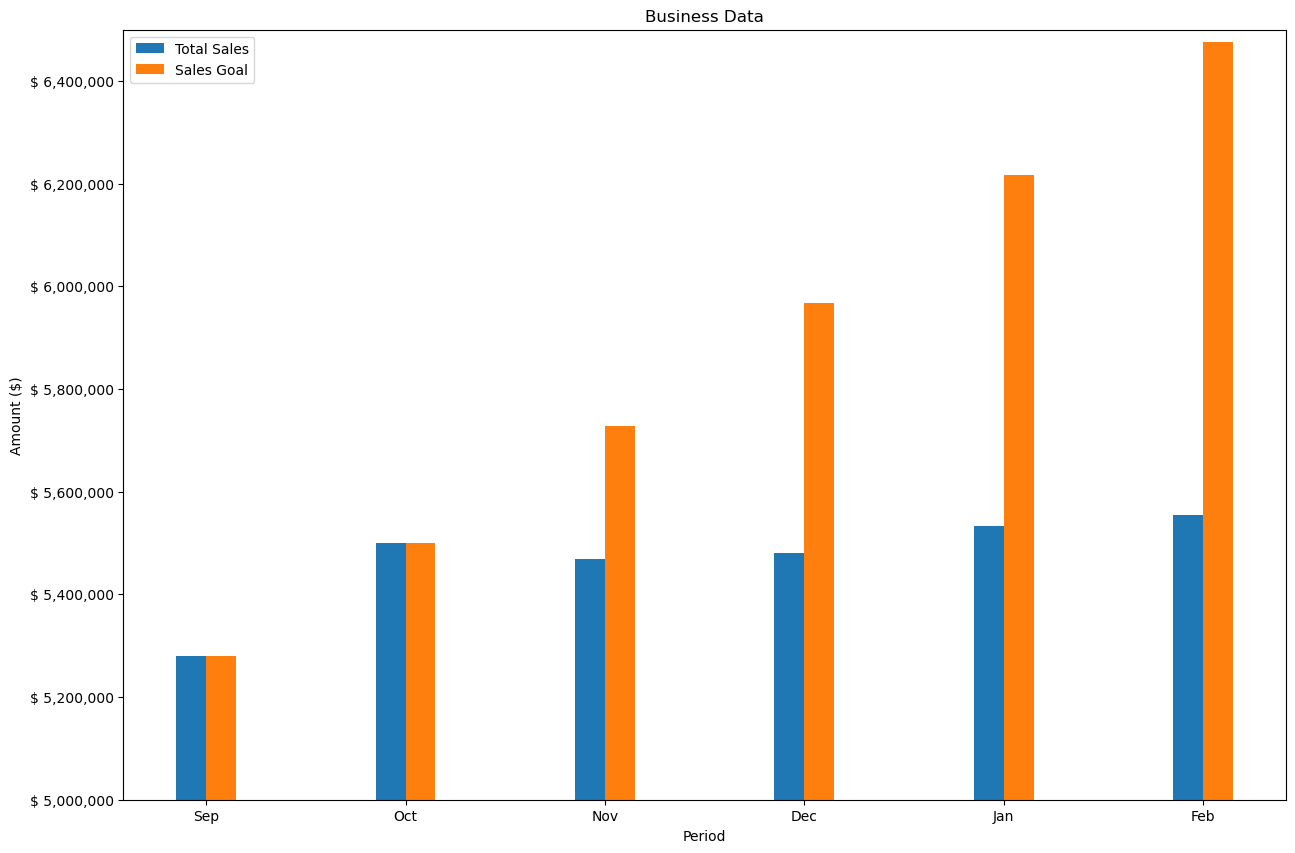

In [6]:
# 막대그래프의 너비
bar_width = 0.15
index = np.arange(len(x))

# y축 포매팅
formatter = FuncFormatter(lambda x, _: '$ '+format(int(x), ','))

_, ax = plt.subplots(figsize=(15,10))

ax.bar(index, total_sales, width=bar_width, label='Total Sales')
ax.bar(index + bar_width, sales_goal, width=bar_width, label='Sales Goal')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(x)
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('Period')
ax.set_ylabel('Amount ($)')
ax.set_title('Business Data')
ax.set_ylim(5000000,6500000)
ax.legend()

plt.savefig('total_sales_with_sales_goal.png')

plt.show()